After playing around a bit I decided to move all of the numbers to the top of the image, as I had this code already from the last homework, and it seemed to help slightly for each model. I then ran the data through all three model types. LDA had the best percentage correct with 88%. I included a csv file for each set of predictions (and submitted them each to kaggle to get their scores).

I believe if I could find out how to truly center the images it would help get that last bit of accuracy, but I am having trouble figuring out how to manipulate the images properly to be able to do that. Some other people in the class have mentioned that they were able to do this so I may see if they will show me how or attend the TA session next week to talk about it.

I am also curious to see the different options sklearn allows you to tweak within the various models to see how that would affect it, but have not had a chance to read more into it and play around with it yet.

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
X = training_data.values[:,1:]
y = training_data.values[:,0]

In [5]:
#move all training images to the top
count = 0
for row in X:
    i = 0
    while row[i] == 0:
        i += 1
    d = int(np.floor(i/28)*28)
    row = np.delete(row,range(0,d))
    row = np.append(row,np.zeros(d))
    X[count] = row
    count +=1

In [6]:
#move all test images to the top
test_values = test_data.values
count = 0
for row in test_values:
    i = 0
    while row[i] == 0:
        i += 1
    d = int(np.floor(i/28)*28)
    row = np.delete(row,range(0,d))
    row = np.append(row,np.zeros(d))
    test_values[count] = row
    count +=1

In [56]:
test_data.shape

(28000, 784)

# LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X,y)

C:\Users\nmnav\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [19]:
LDA_predictions = LDA.predict(test_data.values)

In [20]:
LDA_prediction_data = pd.DataFrame({"label":LDA_predictions})
LDA_prediction_data = LDA_prediction_data.set_index(np.array(range(1,len(LDA_predictions)+1)))
LDA_prediction_data.index = LDA_prediction_data.index.rename("ImageID")

In [41]:
LDA_prediction_data.to_csv("LDA_predictions.csv")

These predictions got a score of 0.87971

# QDA

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [24]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X,y)

C:\Users\nmnav\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [25]:
QDA_predictions = QDA.predict(test_data.values)

In [26]:
QDA_prediction_data = pd.DataFrame({"label":QDA_predictions})
QDA_prediction_data = QDA_prediction_data.set_index(np.array(range(1,len(QDA_predictions)+1)))
QDA_prediction_data.index = QDA_prediction_data.index.rename("ImageID")

In [28]:
QDA_prediction_data.to_csv("QDA_predictions.csv")

These predictions got a score of 0.58657

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Logistic = LogisticRegression()

When I began playing around with the logistic regression, it did not seem to be able to handle all of the training data very well, so I played around with using different(smaller) amounts of it to see which amount worked best. It seems to do the best with around 900 training images so I used that logistic model for the test data.

In [34]:
results = []
for i in range(250,2250,250):
    Logistic.fit(X[0:i],y[0:i])
    results.append([Logistic.score(X[i:],y[i:])])

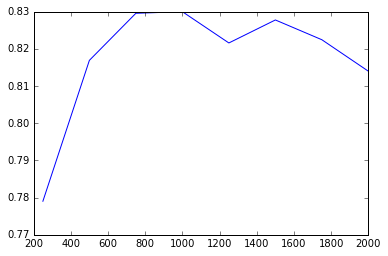

In [35]:
plt.plot(list(range(250,2250,250)),results)

In [37]:
Logistic.fit(X[0:900],y[0:900])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
Logistic_predictions = Logistic.predict(test_data.values)

In [39]:
Logistic_prediction_data = pd.DataFrame({"label":Logistic_predictions})
Logistic_prediction_data = Logistic_prediction_data.set_index(np.array(range(1,len(Logistic_predictions)+1)))
Logistic_prediction_data.index = Logistic_prediction_data.index.rename("ImageID")

In [40]:
Logistic_prediction_data.to_csv("Logistic_predictions.csv")

These predictions got a score of 0.82471